## Imports

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


## Dataset Preparation


In [5]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

y = y['Diagnosis'].map(lambda x : 1 if x == 'M' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

## Decision Tree

In [8]:
depths = range(1, 30)  # range of depths to try
train_scores = []
test_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=7)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

train_scores

[0.9252747252747253,
 0.9692307692307692,
 0.9714285714285714,
 0.9846153846153847,
 0.9934065934065934,
 0.9956043956043956,
 0.9978021978021978,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

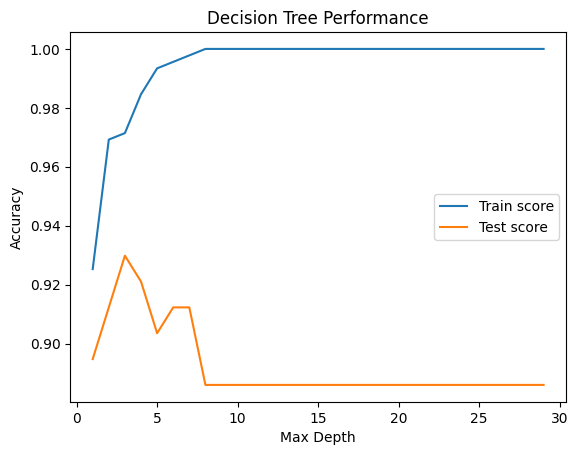

In [ ]:
plt.plot(depths, train_scores, label='Train score')
plt.plot(depths, test_scores, label='Test score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance')
plt.legend()
plt.show()

### Best Decision Tree

Best depth for decision tree: 3


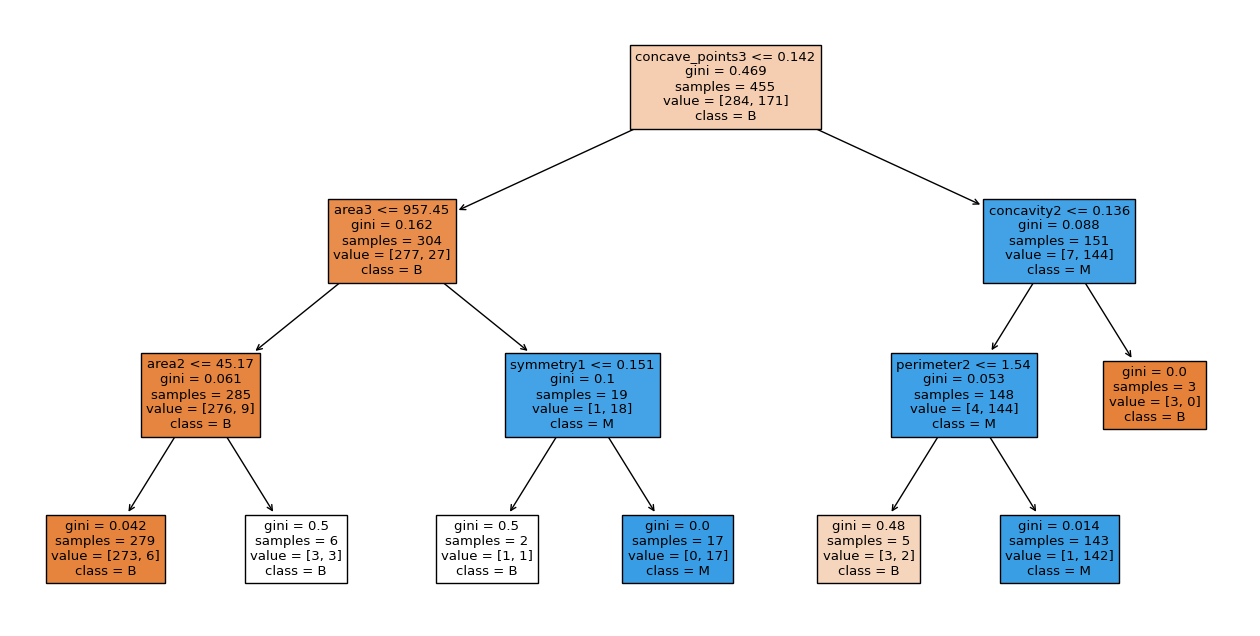

In [ ]:
best_depth = depths[test_scores.index(max(test_scores))]
print(f"Best depth for decision tree: {best_depth}")

best_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=7)
best_clf.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(best_clf, feature_names=X.columns, class_names=['B', 'M'], filled=True)
plt.show()

## Linear Classifier

In [ ]:
feature_clf = DecisionTreeClassifier(max_depth=20, random_state=7)
feature_clf.fit(X_train, y_train)

feature_importances = feature_clf.feature_importances_

top_features_indices = feature_importances.argsort()[::-1]

feature_importances

array([0.00217086, 0.        , 0.        , 0.        , 0.01873816,
       0.01405362, 0.0018083 , 0.        , 0.00419143, 0.        ,
       0.00702681, 0.        , 0.01591699, 0.01728428, 0.        ,
       0.        , 0.02607982, 0.        , 0.        , 0.00106656,
       0.        , 0.01753071, 0.        , 0.13996296, 0.        ,
       0.        , 0.        , 0.73416951, 0.        , 0.        ])

In [ ]:
def logistic_regressor(num_features):
    selected_features_indices = top_features_indices[:num_features]
    selected_features = X.columns[selected_features_indices]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    lr_clf = LogisticRegression(max_iter=10000)
    lr_clf.fit(X_train_selected, y_train)

    y_pred = lr_clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [ ]:
num_features_list = [5, 10, 15, 20]
accuracies = []

for num_features in num_features_list:
    accuracy = logistic_regressor(num_features)
    accuracies.append(accuracy)
    print(f"Accuracy with {num_features} most significant features: {accuracy}")

Accuracy with 5 most significant features: 0.9473684210526315
Accuracy with 10 most significant features: 0.9473684210526315
Accuracy with 15 most significant features: 0.9298245614035088
Accuracy with 20 most significant features: 0.9385964912280702


## Random Forest Tree

In [ ]:
n_estimators_list = [10, 50, 100, 200, 300]  # Number of trees in the forest
train_scores_rf = []
test_scores_rf = []

for n_estimators in n_estimators_list:
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_clf.fit(X_train, y_train)
    train_scores_rf.append(rf_clf.score(X_train, y_train))
    test_scores_rf.append(rf_clf.score(X_test, y_test))

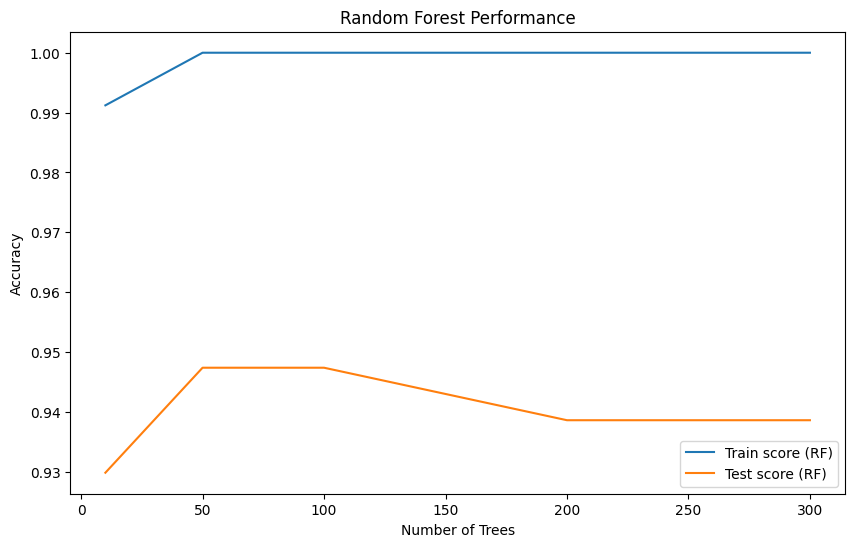

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_scores_rf, label='Train score (RF)')
plt.plot(n_estimators_list, test_scores_rf, label='Test score (RF)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance')
plt.legend()
plt.show()

In [ ]:
best_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf_clf.fit(X_train, y_train)
rf_test_score = best_rf_clf.score(X_test, y_test)

dt_test_score = best_clf.score(X_test, y_test)

print(f"Best Decision Tree test accuracy: {dt_test_score}")
print(f"Random Forest test accuracy: {rf_test_score}")

Best Decision Tree test accuracy: 0.9298245614035088
Random Forest test accuracy: 0.9473684210526315
